In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Dataset_w6.xlsx')

In [3]:
df.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'GDP per capita (current US$)',
       'Agricultural production index ',
       'International trade: Imports (million US$)'],
      dtype='object')

In [64]:
column_names=df.columns

In [66]:
for column in column_names:
    new_name=column.replace(' ','_')
    df.rename(columns={column:new_name}, inplace=True)

In [110]:
df.head(10)

,country,Region,Surface_area_(km2),Population_in_thousands_(2017),GDP_per_capita_(current_US$),Agricultural_production_index_,International_trade:_Imports_(million_US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491
5,Argentina,SouthAmerica,2780400,44271,14564.5,119,55610
6,Armenia,WesternAsia,29743,2930,3489.1,135,3230
7,Australia,Oceania,7692060,24451,51352.2,111,189406
8,Austria,WesternEurope,83871,8736,44117.7,108,149299
9,Azerbaijan,WesternAsia,86600,9828,5438.7,131,8532


In [16]:
df['country'].count()

196

In [77]:
df.isna().sum()

country                                       0
Region                                        0
Surface_area_(km2)                            0
Population_in_thousands_(2017)                0
GDP_per_capita_(current_US$)                  0
Agricultural_production_index_                0
International_trade:_Imports_(million_US$)    0
dtype: int64

# Visualization

C:\Users\ss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


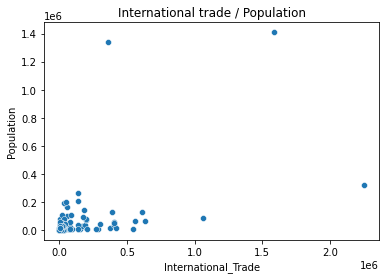

In [160]:
population=df['Population_in_thousands_(2017)']
Internation_trade=df['International_trade:_Imports_(million_US$)']
sns.scatterplot(Internation_trade,population)
plt.title("International trade / Population")
plt.xlabel('International_Trade')
plt.ylabel('Population')
plt.show()

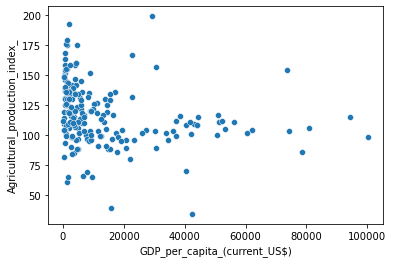

In [75]:
sns.scatterplot(x='GDP_per_capita_(current_US$)', y='Agricultural_production_index_', data=df)
plt.show()

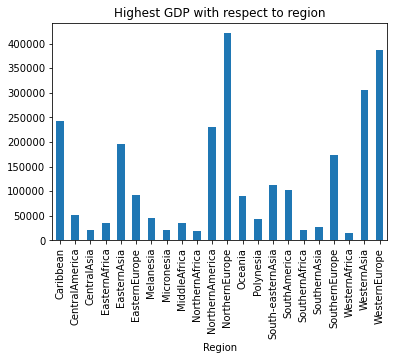

In [134]:
df.groupby('Region')['GDP_per_capita_(current_US$)'].sum().plot(kind='bar')
plt.title('Highest GDP with respect to region')
plt.show()

Northern Europe has highest GDP

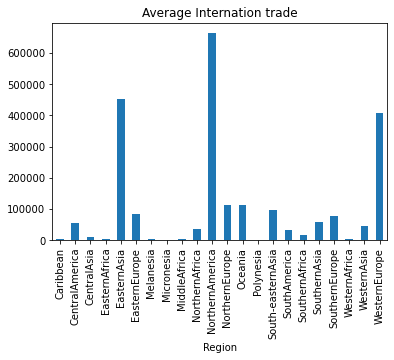

In [144]:
df.groupby(by=['Region'])['International_trade:_Imports_(million_US$)'].mean().plot(kind='bar')
plt.title('Average Internation trade')
plt.show()

North America has the highest average Internation trade

<AxesSubplot:>

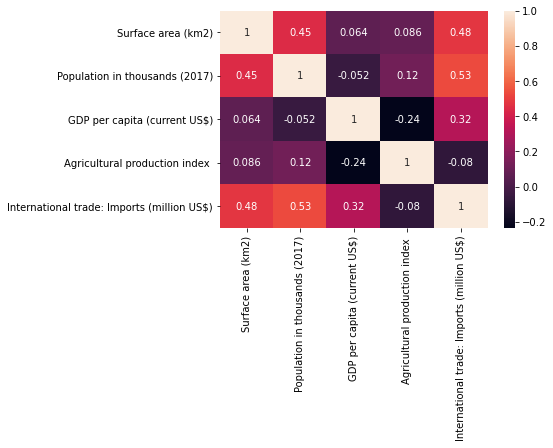

In [53]:
sns.heatmap(df.corr(), annot=True)

In [169]:
df.groupby('Region')['country'].count()
#Number of countries in each region

Region
Caribbean            16
CentralAmerica        8
CentralAsia           5
EasternAfrica        17
EasternAsia           7
EasternEurope        10
Melanesia             5
Micronesia            4
MiddleAfrica          9
NorthernAfrica        5
NorthernAmerica       4
NorthernEurope       10
Oceania               2
Polynesia             5
South-easternAsia    11
SouthAmerica         12
SouthernAfrica        5
SouthernAsia          9
SouthernEurope       12
WesternAfrica        15
WesternAsia          18
WesternEurope         7
Name: country, dtype: int64

# On average which region has highest GDP per capita

In [171]:
average_GDP=df.groupby('Region')['GDP_per_capita_(current_US$)'].mean()


In [172]:
average_GDP.nlargest()

Region
NorthernAmerica    57659.000000
WesternEurope      55387.128571
Oceania            44823.250000
NorthernEurope     42098.220000
EasternAsia        27967.614286
Name: GDP_per_capita_(current_US$), dtype: float64

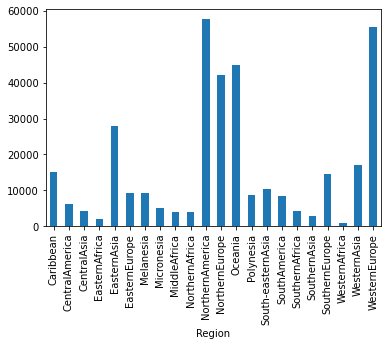

In [181]:
#Visualization
average_GDP=df.groupby('Region')['GDP_per_capita_(current_US$)'].mean().plot(kind='bar')

NorthAmerica, has highest GDP per capita

# On average which region has highest internation trade

In [174]:
average_international_trade=df.groupby('Region')['International_trade:_Imports_(million_US$)'].mean()

In [175]:
average_international_trade.nlargest()

Region
NorthernAmerica    663552.250000
EasternAsia        451995.000000
WesternEurope      407498.428571
NorthernEurope     113407.200000
Oceania            112914.500000
Name: International_trade:_Imports_(million_US$), dtype: float64

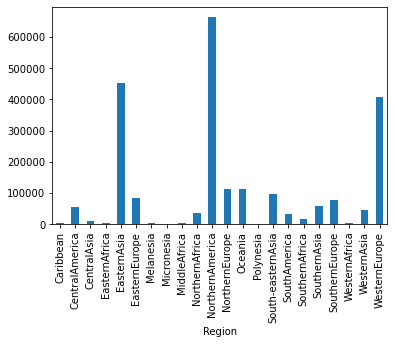

In [180]:
#Visualization
average_international_trade=df.groupby('Region')['International_trade:_Imports_(million_US$)'].mean().plot(kind='bar')

North America has highest average international trade

# Which region more consistent with respect to GDP

In [177]:
consistent_GDP=df.groupby('Region')['GDP_per_capita_(current_US$)'].std()

In [178]:
consistent_GDP.nsmallest()

Region
WesternAfrica      815.095399
NorthernAfrica     974.706575
SouthernAfrica    2177.551120
SouthernAsia      2855.708179
EasternAfrica     3716.131770
Name: GDP_per_capita_(current_US$), dtype: float64

WesternAfrica and North Africa has lowest Standard deviation. They have  consistent GDP growth

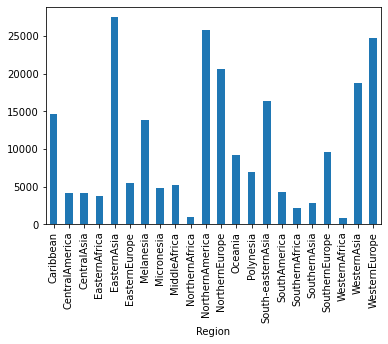

In [179]:
#Visualization
consistent_GDP=df.groupby('Region')['GDP_per_capita_(current_US$)'].std().plot(kind='bar')